In [12]:
import pandas as pd
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df=pd.read_csv("Spotify-2000.csv")

In [4]:
df.head(3)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69


In [5]:
df.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [8]:
df=df.drop("Index",axis=1)

In [10]:
df.head(3)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69


In [13]:
df1=df.select_dtypes(exclude=["object"])

In [14]:
df1.head(3)

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
0,2004,157,30,53,-14,11,68,94,3,71
1,2000,135,79,50,-11,17,81,17,7,39
2,2001,168,69,66,-9,7,52,2,17,69


In [17]:
x=df1[["Beats Per Minute (BPM)","Loudness (dB)","Liveness","Valence","Acousticness","Speechiness"]]

In [18]:
x.head(3)

,Beats Per Minute (BPM),Loudness (dB),Liveness,Valence,Acousticness,Speechiness
0,157,-14,11,68,94,3
1,135,-11,17,81,17,7
2,168,-9,7,52,2,17


In [25]:
model=KMeans(n_clusters=10)
model=model.fit(x)

In [26]:
tahmin=model.predict(x)

In [27]:
tahmin

array([6, 0, 9, ..., 6, 6, 8])

In [28]:
x["cluster"]=tahmin

C:\Users\Fatma\AppData\Local\Temp\ipykernel_13896\354242828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["cluster"]=tahmin


In [29]:
x.head(3)

,Beats Per Minute (BPM),Loudness (dB),Liveness,Valence,Acousticness,Speechiness,cluster
0,157,-14,11,68,94,3,6
1,135,-11,17,81,17,7,0
2,168,-9,7,52,2,17,9


In [30]:
silhouette_score(x,tahmin)

0.24192283255221178

In [31]:
x.head(3)

,Beats Per Minute (BPM),Loudness (dB),Liveness,Valence,Acousticness,Speechiness,cluster
0,157,-14,11,68,94,3,6
1,135,-11,17,81,17,7,0
2,168,-9,7,52,2,17,9


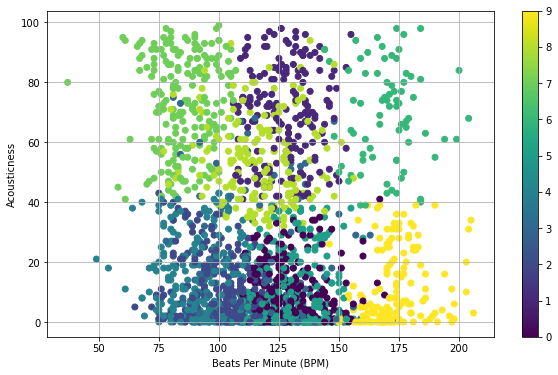

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(x["Beats Per Minute (BPM)"],x["Acousticness"],c=tahmin) # c renk için c nin farklı olması gerek
# başlıkların için nokta boşluk olduğu için ayrı ayrı parantezle x i yazdık
plt.xlabel("Beats Per Minute (BPM)") # x sutununa isim verdik
plt.ylabel("Acousticness") # y sutununa isim verdik
plt.colorbar()
# plt.legend()
plt.grid()
# plt.scatter.... kısmı yeterl

In [33]:
allscore=[]
allclusters=[]
uzaklıklar=[]
def clust(kactane):
    
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklık=model.inertia_
        print(" Cluster ",i," score ",score)
        allscore.append(score)
        allclusters.append(i)
        uzaklıklar.append(uzaklık)
clust(10)

 Cluster  2  score  0.2975714411498699
 Cluster  3  score  0.26063673339269683
 Cluster  4  score  0.25698878878200354
 Cluster  5  score  0.2526511577788393
 Cluster  6  score  0.2702479347358929
 Cluster  7  score  0.25813289981068743
 Cluster  8  score  0.26802089370111026
 Cluster  9  score  0.24408583097351955
 Cluster  10  score  0.24192283255221178
 Cluster  11  score  0.23819509568356462


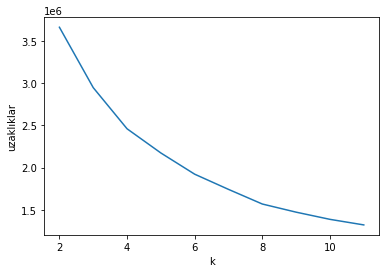

In [34]:
plt.xlabel("k")
plt.ylabel("uzaklıklar")
plt.plot(allclusters,uzaklıklar)